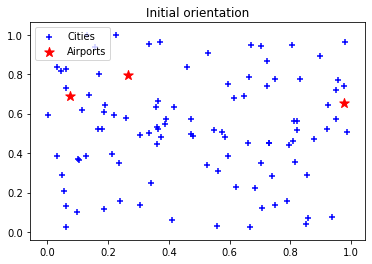

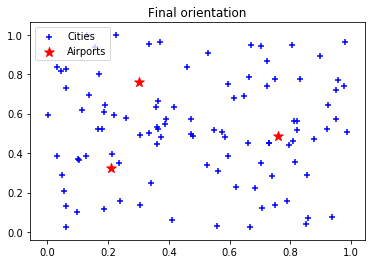

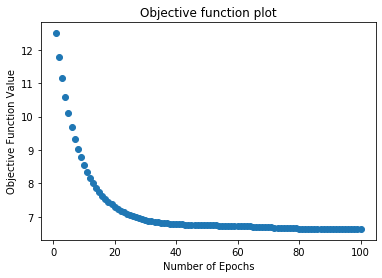

In [8]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
#
#
#
#GLOBAL VARIABLES
num_city = 100
num_air = 3
cities = set()
airports = []
obj_values = []
#INITIALIZE CITIES
for i in range(num_city):
    x = random.random()
    y = random.random()
    cities.add((x,y))
#INITIALIZE AIRPORTS
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))
#
#
#
def g_func(airports):
    
    x1_sum,y1_sum,x2_sum,y2_sum,x3_sum,y3_sum = 0,0,0,0,0,0
    (x1, y1) = airports[0]
    (x2, y2) = airports[1]
    (x3, y3) = airports[2]    

    for i in range(len(airListPlusCities)):
        xc,yc = airListPlusCities[i][1][0], airListPlusCities[i][1][1]

        if(airListPlusCities[i][0]) == 0:
            x1_sum += ((x1 - xc))
            y1_sum += ((y1 - yc))

        if(airListPlusCities[i][0]) == 1:
            x2_sum += ((x2 - xc))
            y2_sum += ((y2 - yc))

        if(airListPlusCities[i][0]) == 2:
            x3_sum += ((x3 - xc))
            y3_sum += ((y3 - yc))

        gradient = ((2 * x1_sum,2 * y1_sum),(2 * x2_sum,2 * y2_sum), (2 * x3_sum,2 * y3_sum))

    return gradient
#
#
#
def obj_func() :
    #
    sum1 = 0
    sum2 = 0
    sum3 = 0
    (x1, y1) = airports[0]
    (x2, y2) = airports[1]
    (x3, y3) = airports[2]     

    for i in range(len(airListPlusCities)):
        xc, yc = airListPlusCities[i][1][0], airListPlusCities[i][1][1]

        if(airListPlusCities[i][0]) == 0:
            sum1 += (x1 - xc)**2 + (y1 - yc)**2
            
        elif(airListPlusCities[i][0]) == 1:
            sum2 += (x2 - xc)**2 + (y2 - yc)**2
            
        elif(airListPlusCities[i][0]) == 2:
            sum3 += (x3 - xc)**2 + (y3 - yc)**2
    
    return (sum1 + sum2 + sum3)       
#            
#
#
def distanceOfTwoPoints(xa, ya, xc, yc):
    '''
    calculates linear distance between two coordinates
    '''
    return math.sqrt( ((xa - xc)**2) + ((ya - yc)**2) )
#
#
#
def setAirPortForCities():
    ''' 
    iterate through each city in cities tuple and calculate the distance 
    from 3 airpors to each city, find the closest airport and add 
    (airport#, (xcity, ycity)) into list
    '''   
    (x1, y1) = airports[0]
    (x2, y2) = airports[1]
    (x3, y3) = airports[2]
    
    for city in cities:
        (xc,yc) = city
        distanceFromA1 = distanceOfTwoPoints(x1, y1, xc, yc)
        distanceFromA2 = distanceOfTwoPoints(x2, y2, xc, yc)
        distanceFromA3 = distanceOfTwoPoints(x3, y3, xc, yc)

        minD = np.argmin([distanceFromA1, distanceFromA2, distanceFromA3])
        kac = (minD , city)
        airListPlusCities.append(kac)
#            
#    
#   
def display_plot():
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    zip_airs = zip(*airports)
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.legend()
    plt.show()



################################################
# Main
################################################

if __name__ == "__main__":

  plt.title('Initial orientation')
  display_plot()
  #
  #
  #
  epochs = 100
  alpha = .001
  #
  for i in range(epochs) :
      #BUCKET CITIES
      airListPlusCities = []
      setAirPortForCities()
      list.sort(airListPlusCities)
      
      #MOVE AIRPORTS
      grad = g_func(airports)
      for i in range(3):
          x = airports[i][0] - (alpha * grad[i][0])
          y = airports[i][1] - (alpha * grad[i][1])
      
          airports[i] = (x,y)
          
      #COMPUTE OBJECTIVE FUNCTION
      objective = obj_func()
      obj_values.append(objective)

  print("\n\n")
  plt.title('Final orientation')
  display_plot()

  print("\n\n")
  plt.title('Objective function plot')
  plt.scatter(np.arange(1, epochs+1), obj_values)
  plt.ylabel('Objective Function Value')
  plt.xlabel('Number of Epochs')
  plt.show()


The objective function is given by $f(x_1,y_1,x_2,y_2,x_3,y_3)=\sum_{i=1}^n\sum_{c\in C_i}(x_i-x_c)^2+(y_i-y_c)^2$ where $n$ is the number of the airports and $C_i$ is the set of cities whose closest airport is airport $i$. The goal of the program is determining the locations of airports that minimize the objective function using gradient based optimizatoin. 

The gradient of the objective function is $\nabla f(x_1,y_1,x_2,y_2,x_3,y_3)=\big(2\sum_{c\in C_1}(x_1-x_c),2\sum_{c\in C_1}(y_1-y_c),2\sum_{c\in C_2}(x_2-x_c),2\sum_{c\in C_2}(y_2-y_c),2\sum_{c\in C_3}(x_3-x_c),2\sum_{c\in C_3}(y_3-y_c)\big)$

By updating $(x_1,y_1,x_2,y_2,x_3,y_3)\gets (x_1,y_1,x_2,y_2,x_3,y_3)-\alpha \nabla f(x_1,y_1,x_2,y_2,x_3,y_3)$ where $0<\alpha\ll1$ is a constant, **find the optimal locations of the airports $(x_1,y_1,x_2,y_2,x_3,y_3)$.**

Every time the locations of the airports are updated, **plot the objective value as shown in the figure**.

<Note: The objective values may be different than the example.>
<img src="airports_loss.png" style="width:400px">